In [1]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the csv. Use the variable customer_df as customer_df = pd.read_csv()

customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#What should we do with the customer_id column?

#we should drop it as it doesn't provide any info for the analysis.

In [5]:
customer_df.drop(['Customer'], axis=1, inplace=True)

In [6]:
#Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    #numerical_df = customer_df.select_dtypes()
    #categorical_df = customer_df.select_dtypes()

In [7]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [9]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date']) 
#As we did in the previous Lab, we change the dtype of "Effective To Date" from object to datetime


In [10]:
numerical_df = customer_df.select_dtypes(exclude="object")
categorical_df = customer_df.select_dtypes(include="object")

In [11]:
numerical_df.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [12]:
categorical_df.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
#Plot every categorical variable. What can you see in the plots? 
#Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column 
#on the x-axis and an appropriate measure on the y-axis. 

#However, this time you will try a different plot. This time in each plot for the categorical variable you will have, 
#each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis




In [ ]:
#I will choose "Income" as numerical target. 
#It will be interesting to see an average of this variable in each unique category

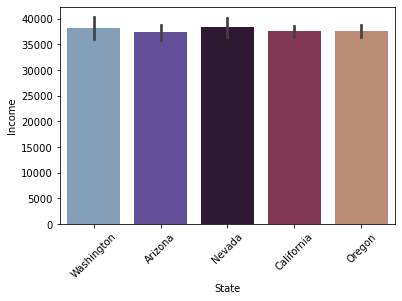

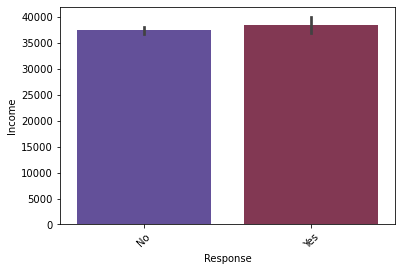

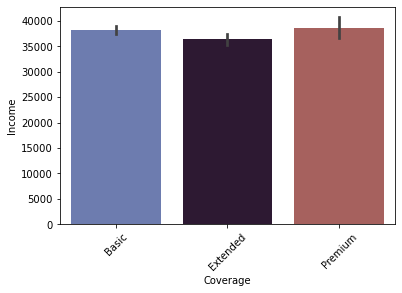

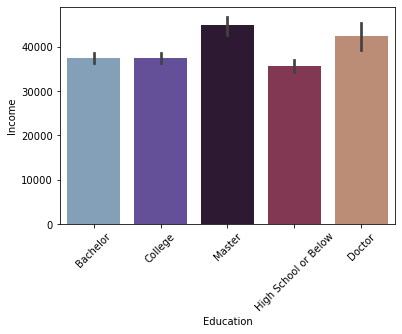

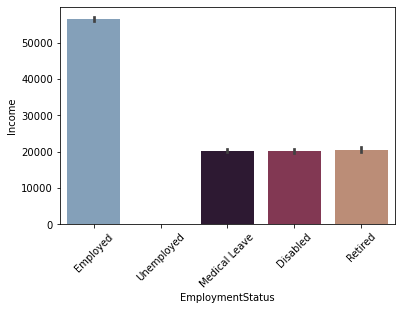

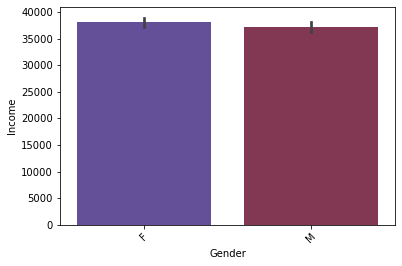

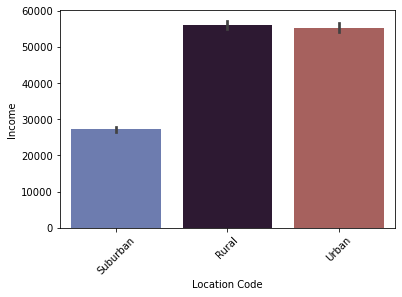

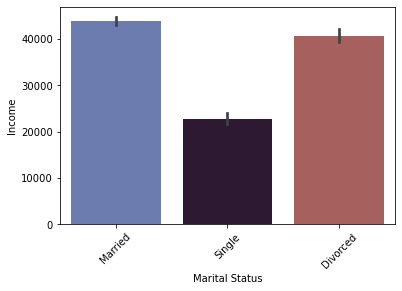

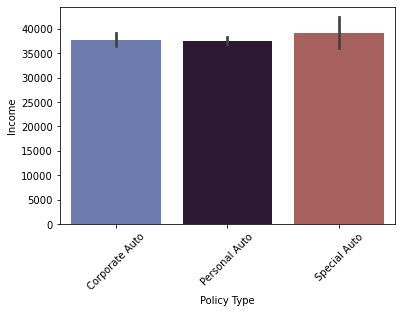

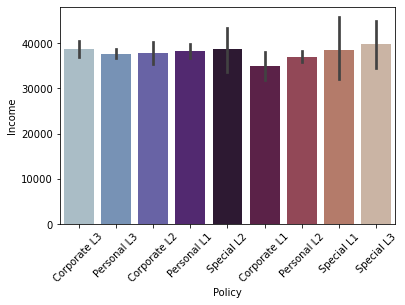

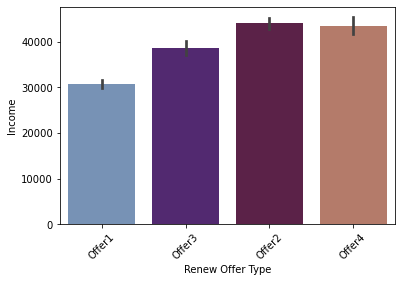

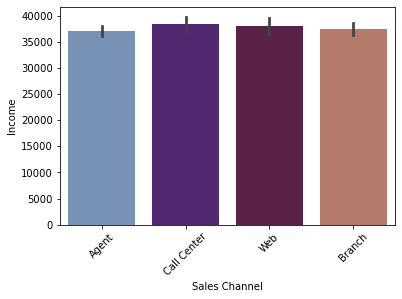

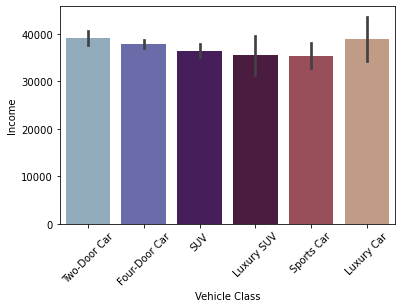

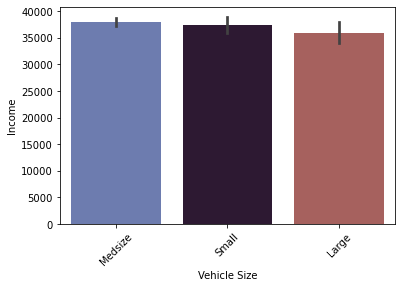

In [13]:
for column in categorical_df:
    plt.figure()
    sns.barplot(x=column, y='Income', data= customer_df, palette = 'twilight')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#For the categorical data, check if there is any data cleaning that need to perform. 
#Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
#Discuss if this information might in some way be used for data cleaning.
    
    

In [18]:
for column in categorical_df:
    print(categorical_df[column].value_counts().to_markdown())

|            |   State |
|:-----------|--------:|
| California |    3150 |
| Oregon     |    2601 |
| Arizona    |    1703 |
| Nevada     |     882 |
| Washington |     798 |
|     |   Response |
|:----|-----------:|
| No  |       7826 |
| Yes |       1308 |
|          |   Coverage |
|:---------|-----------:|
| Basic    |       5568 |
| Extended |       2742 |
| Premium  |        824 |
|                      |   Education |
|:---------------------|------------:|
| Bachelor             |        2748 |
| College              |        2681 |
| High School or Below |        2622 |
| Master               |         741 |
| Doctor               |         342 |
|               |   EmploymentStatus |
|:--------------|-------------------:|
| Employed      |               5698 |
| Unemployed    |               2317 |
| Medical Leave |                432 |
| Disabled      |                405 |
| Retired       |                282 |
|    |   Gender |
|:---|---------:|
| F  |     4658 |
| M  |     